<a href="https://colab.research.google.com/github/anhdang1/stock-correlation-analysis/blob/main/Practice_eod_analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl,plt
plt.style.use('seaborn')
%matplotlib inline

**Import the stock data**

In [2]:
df = pd.read_csv('stock_price_data_eod_prj.csv', usecols=[0,2,4], parse_dates = True) #importing close price, symbol, and date 

In [3]:
df.head()  #head is first few rows

,date,close,ticker
0,2020-12-31T00:00:00+0000,1752.64,GOOGL
1,2020-12-30T00:00:00+0000,1736.25,GOOGL
2,2020-12-29T00:00:00+0000,1757.76,GOOGL
3,2020-12-28T00:00:00+0000,1773.96,GOOGL
4,2020-12-24T00:00:00+0000,1734.16,GOOGL


**In your project notebook you will need to edit the line below**

In [6]:
df4 = df.pivot_table(index = 'date',columns = 'ticker', values = 'close') #pivoting so that symbols become individual columns

In [8]:
df4.head()

ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT
date,,,,,,,,,,,,,,
2020-08-11T00:00:00+0000,99.06,3080.67,248.42,130.49,256.13,1480.54,146.97,103.82,328.54,203.38,466.93,434.00,189.03,130.20
2020-08-12T00:00:00+0000,100.65,3162.24,255.19,131.79,259.89,1507.24,149.66,102.94,327.63,209.19,475.47,457.61,191.32,131.89
2020-08-13T00:00:00+0000,101.10,3161.02,253.72,130.96,261.30,1516.65,148.00,102.37,326.19,208.70,481.33,457.72,193.07,131.85
2020-08-14T00:00:00+0000,99.99,3148.02,253.97,130.53,261.24,1504.63,148.24,102.41,326.80,208.90,482.68,462.56,191.46,132.60
2020-08-17T00:00:00+0000,100.71,3182.41,256.96,129.37,261.16,1516.24,148.99,99.71,330.23,210.28,482.35,493.48,196.29,135.60


In [9]:
df4.info() #a better processing would process the dates so that pandas recognizes them as dates.  Also only 100 entries here, not enough.

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2020-08-11T00:00:00+0000 to 2020-12-31T00:00:00+0000
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ABT     100 non-null    float64
 1   AMZN    100 non-null    float64
 2   BABA    100 non-null    float64
 3   DIS     100 non-null    float64
 4   FB      100 non-null    float64
 5   GOOGL   100 non-null    float64
 6   JNJ     100 non-null    float64
 7   JPM     100 non-null    float64
 8   MA      100 non-null    float64
 9   MSFT    100 non-null    float64
 10  NFLX    100 non-null    float64
 11  NVDA    100 non-null    float64
 12  PYPL    100 non-null    float64
 13  WMT     100 non-null    float64
dtypes: float64(14)
memory usage: 11.7+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fd4f837d0>,
      dtype=object)

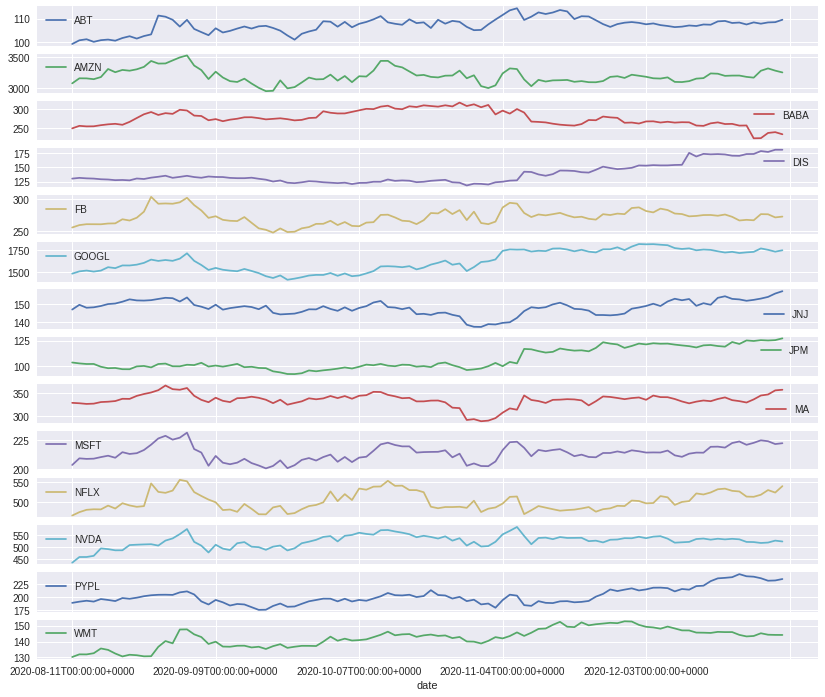

In [10]:
df4.plot(figsize=(14,12),  subplots = True)  

In [11]:
df4.describe().round(2)  #summary stats, rounded

ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,107.13,3198.74,276.23,138.63,272.39,1629.31,148.12,107.24,334.74,213.68,503.15,523.73,202.03,142.41
std,3.27,114.84,20.64,17.27,11.53,122.50,4.12,10.35,13.87,6.89,22.80,26.06,15.79,5.89
min,99.06,2954.91,222.00,118.47,248.15,1409.39,137.11,92.66,288.64,200.39,466.93,434.00,175.79,130.20
25%,105.65,3127.86,261.75,126.44,264.28,1516.55,145.98,99.62,330.81,209.38,484.64,508.76,191.61,137.35
50%,107.57,3183.68,273.48,131.77,272.61,1620.22,148.29,102.36,335.97,214.10,497.24,525.87,197.73,143.34
75%,108.98,3269.64,292.07,147.35,277.97,1752.36,151.08,117.98,341.45,217.57,524.07,540.08,210.96,146.13
max,114.42,3531.45,317.14,181.18,303.91,1824.97,157.38,127.07,366.12,231.65,556.55,582.48,243.49,152.79


In [12]:
df4.mean()   #means only

ticker
ABT       107.1306
AMZN     3198.7356
BABA      276.2280
DIS       138.6336
FB        272.3945
GOOGL    1629.3137
JNJ       148.1176
JPM       107.2427
MA        334.7445
MSFT      213.6808
NFLX      503.1515
NVDA      523.7284
PYPL      202.0343
WMT       142.4073
dtype: float64

In [13]:
df4.diff().head()      #daily returns  NaN is Not a Number.  

ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT
date,,,,,,,,,,,,,,
2020-08-11T00:00:00+0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-12T00:00:00+0000,1.59,81.57,6.77,1.30,3.76,26.70,2.69,-0.88,-0.91,5.81,8.54,23.61,2.29,1.69
2020-08-13T00:00:00+0000,0.45,-1.22,-1.47,-0.83,1.41,9.41,-1.66,-0.57,-1.44,-0.49,5.86,0.11,1.75,-0.04
2020-08-14T00:00:00+0000,-1.11,-13.00,0.25,-0.43,-0.06,-12.02,0.24,0.04,0.61,0.20,1.35,4.84,-1.61,0.75
2020-08-17T00:00:00+0000,0.72,34.39,2.99,-1.16,-0.08,11.61,0.75,-2.70,3.43,1.38,-0.33,30.92,4.83,3.00


In [14]:
df4.pct_change().round(3).head()  #percent changes

ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT
date,,,,,,,,,,,,,,
2020-08-11T00:00:00+0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-12T00:00:00+0000,0.016,0.026,0.027,0.010,0.015,0.018,0.018,-0.008,-0.003,0.029,0.018,0.054,0.012,0.013
2020-08-13T00:00:00+0000,0.004,-0.000,-0.006,-0.006,0.005,0.006,-0.011,-0.006,-0.004,-0.002,0.012,0.000,0.009,-0.000
2020-08-14T00:00:00+0000,-0.011,-0.004,0.001,-0.003,-0.000,-0.008,0.002,0.000,0.002,0.001,0.003,0.011,-0.008,0.006
2020-08-17T00:00:00+0000,0.007,0.011,0.012,-0.009,-0.000,0.008,0.005,-0.026,0.010,0.007,-0.001,0.067,0.025,0.023


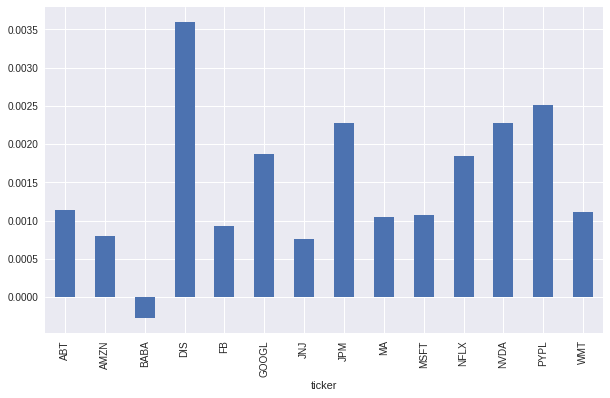

In [17]:
df4.pct_change().mean().plot(kind = 'bar', figsize = (10,6))   #plot average percent changes  

In [18]:
returns = np.log(df4/df4.shift(1))

In [19]:
returns.head().round(3)

ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT
date,,,,,,,,,,,,,,
2020-08-11T00:00:00+0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-12T00:00:00+0000,0.016,0.026,0.027,0.010,0.015,0.018,0.018,-0.009,-0.003,0.028,0.018,0.053,0.012,0.013
2020-08-13T00:00:00+0000,0.004,-0.000,-0.006,-0.006,0.005,0.006,-0.011,-0.006,-0.004,-0.002,0.012,0.000,0.009,-0.000
2020-08-14T00:00:00+0000,-0.011,-0.004,0.001,-0.003,-0.000,-0.008,0.002,0.000,0.002,0.001,0.003,0.011,-0.008,0.006
2020-08-17T00:00:00+0000,0.007,0.011,0.012,-0.009,-0.000,0.008,0.005,-0.027,0.010,0.007,-0.001,0.065,0.025,0.022


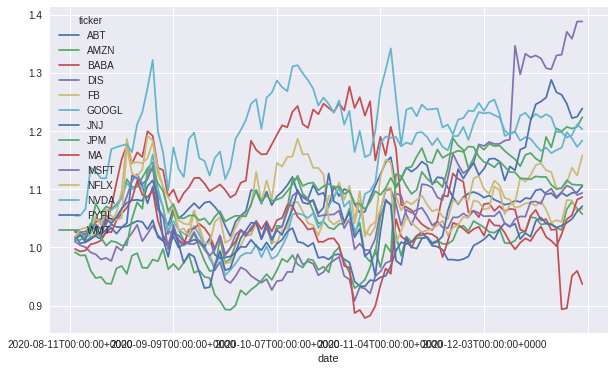

In [20]:
returns.cumsum().apply(np.exp).plot(figsize = (10,6))

A simple technical analysis of one stock. Moving average for x days of a particular stock.

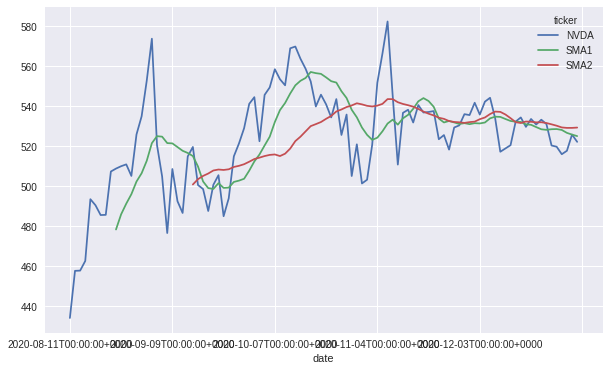

In [21]:
symbol = 'NVDA'  #a simplistic technical analysis on one stock. finding crossing over/under points of moving averages
df4['SMA1'] = df4[symbol].rolling(window = 10).mean()    #moving averages.  since only 100 days, 10 and 25 were chosen as windows
df4['SMA2'] = df4[symbol].rolling(window = 25).mean()
df4[[symbol,'SMA1','SMA2']].plot(figsize = (10,6))       #plotting to find crossing points of moving averages

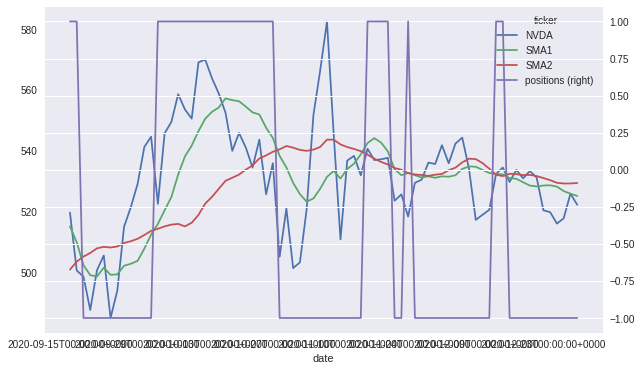

In [22]:
df4.dropna(inplace = True)     #get rid of NaNs.
df4['positions'] = np.where(df4['SMA1'] > df4['SMA2'], 1, -1 )   #an if..else  Go long if short term SMA above long term SMA (1)
axis = df4[[symbol,'SMA1','SMA2', 'positions']].plot(figsize = (10,6),secondary_y = 'positions')


In [23]:
df4.head()  #just reviewing we still got the data


ticker,ABT,AMZN,BABA,DIS,FB,GOOGL,JNJ,JPM,MA,MSFT,NFLX,NVDA,PYPL,WMT,SMA1,SMA2,positions
date,,,,,,,,,,,,,,,,,
2020-09-15T00:00:00+0000,106.58,3156.13,277.96,131.24,272.42,1535.12,148.89,99.28,339.14,208.78,495.99,519.64,186.02,137.36,515.092,500.8396,1
2020-09-16T00:00:00+0000,105.70,3078.10,278.14,132.09,263.52,1512.09,148.40,99.70,341.85,205.05,483.86,500.58,180.91,136.26,509.866,503.5028,1
2020-09-17T00:00:00+0000,106.66,3008.73,275.72,130.22,254.82,1487.04,147.17,98.56,339.43,202.91,470.20,498.54,175.79,136.69,502.334,505.1400,-1
2020-09-18T00:00:00+0000,106.86,2954.91,272.41,128.63,252.53,1451.09,149.18,98.35,335.26,200.39,469.96,487.57,176.07,135.29,499.029,506.3340,-1
2020-09-21T00:00:00+0000,105.95,2960.47,273.82,125.41,248.15,1430.14,145.10,95.31,327.85,202.54,487.35,500.69,183.21,137.07,498.608,507.8592,-1


Let us compare two stocks to see if they are correlated.

In [24]:
df3 = df4[['MSFT','AMZN']].dropna()   #extracting msft and amzn.  some say these move together. do they?
df3.head()

ticker,MSFT,AMZN
date,,
2020-09-15T00:00:00+0000,208.78,3156.13
2020-09-16T00:00:00+0000,205.05,3078.10
2020-09-17T00:00:00+0000,202.91,3008.73
2020-09-18T00:00:00+0000,200.39,2954.91
2020-09-21T00:00:00+0000,202.54,2960.47


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fc5e99990>,
      dtype=object)

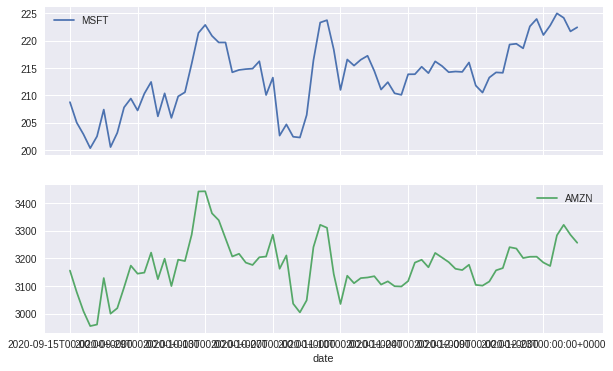

In [25]:
df3.plot(subplots = True, figsize = (10,6))   # let us look at their plots to see if they are correlated

In [26]:
rets = np.log(df3/df3.shift(1))      #taking a different look at possible correlation, by looking at log returns
rets.head()

ticker,MSFT,AMZN
date,,
2020-09-15T00:00:00+0000,NaN,NaN
2020-09-16T00:00:00+0000,-0.018027,-0.025034
2020-09-17T00:00:00+0000,-0.010491,-0.022794
2020-09-18T00:00:00+0000,-0.012497,-0.018050
2020-09-21T00:00:00+0000,0.010672,0.001880


In [27]:
rets.dropna(inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fc5cf5310>,
      dtype=object)

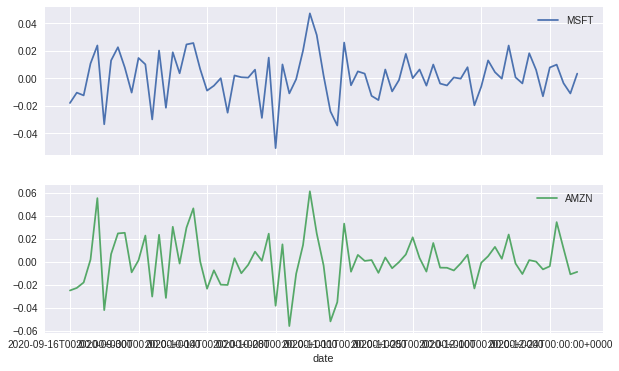

In [29]:
rets.plot(subplots = True, figsize = (10,6)) #clearer evidence of the correlation

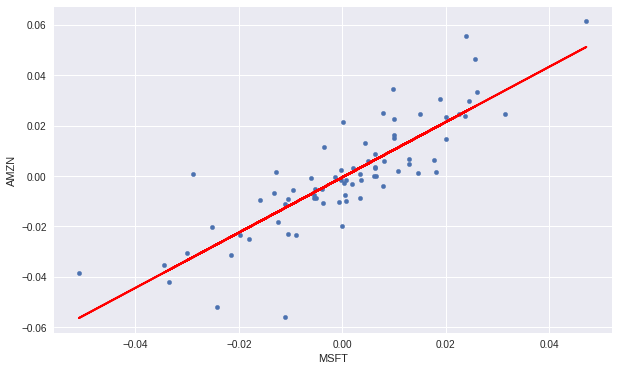

In [30]:
regr = np.polyfit(rets['MSFT'], rets['AMZN'], deg = 1)  #doing an OLS regression to confirm
axs = rets.plot(kind = 'scatter', x = 'MSFT', y = 'AMZN', figsize = (10,6)) #scatter plot of log returns
axs.plot(rets['MSFT'], np.polyval(regr, rets['MSFT']), 'r', lw = 2)  #regression line overlay as red line

In [31]:
rets.corr()  #let us just ask for the corr.value

ticker,MSFT,AMZN
ticker,,
MSFT,1.000000,0.839571
AMZN,0.839571,1.000000
